## Scale resolution

In [2]:
import aplpy
from astropy.io import fits
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
HDU = fits.open('/Users/robitaij/postdoc/Planck/HFI_tau353_polaris_6x_cut.fits')
imP = HDU[0].data / 1.2e-26
hdP = HDU[0].header
resoP = hdP['CDELT2'] * 60.
imP -= np.mean(imP)

HDU2 = fits.open('/Users/robitaij/postdoc/Herschel/Gould Belt/HGBS_polaris_cdens_rot_rebin_cut.fits')
imH = HDU2[0].data
hdH = HDU2[0].header
resoH = hdH['CDELT2'] * 60.
imH -= np.mean(imH)

In [4]:
from wavan import fan_trans
from astropy import wcs
from rebin import congrid
from scipy import interpolate

In [5]:
wtH, S11aH, wav_kH, S1aH, qH = fan_trans(imH, reso=resoH, q=0, qdyn=False, apodize= 0.98, arrdim = np.array([950,950]))
wtP, S11aP, wav_kP, S1aP, qP = fan_trans(imP, scales=wav_kH[0:9], reso=resoP, q=0, qdyn=False, apodize= 0.98, arrdim = np.array([800,800]))

950 950
800 800


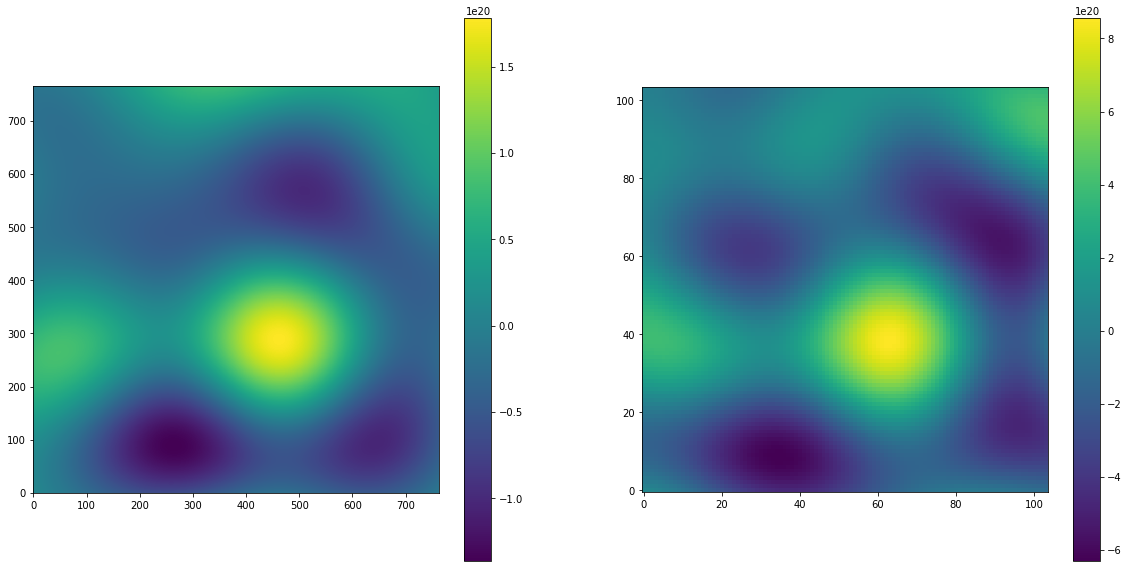

In [58]:
MP = wav_kP.size
MH = wav_kH.size

wP = wcs.WCS(hdP,HDU)
wH = wcs.WCS(hdH,HDU2)

wx0H, wy0H = wH.all_pix2world(0,0,0)
x0P, y0P = wP.all_world2pix(wx0H, wy0H,0)

wx1H, wy1H = wH.all_pix2world(HDU2[0].data.shape[1]-1,HDU2[0].data.shape[0]-1,0)
x1P, y1P = wP.all_world2pix(wx1H, wy1H,0)

scale = 3

figure(figsize=(20,10))
subplot(1,2,1)
imshow(wtH[scale,:,:].real,origin='below')
plt.colorbar()

subplot(1,2,2)
#imshow(wtP[2*M+scale,:,:].real,origin='below')
imshow(wtP[scale,int(y0P):int(y1P),int(x0P):int(x1P)].real,origin='below')
plt.colorbar()

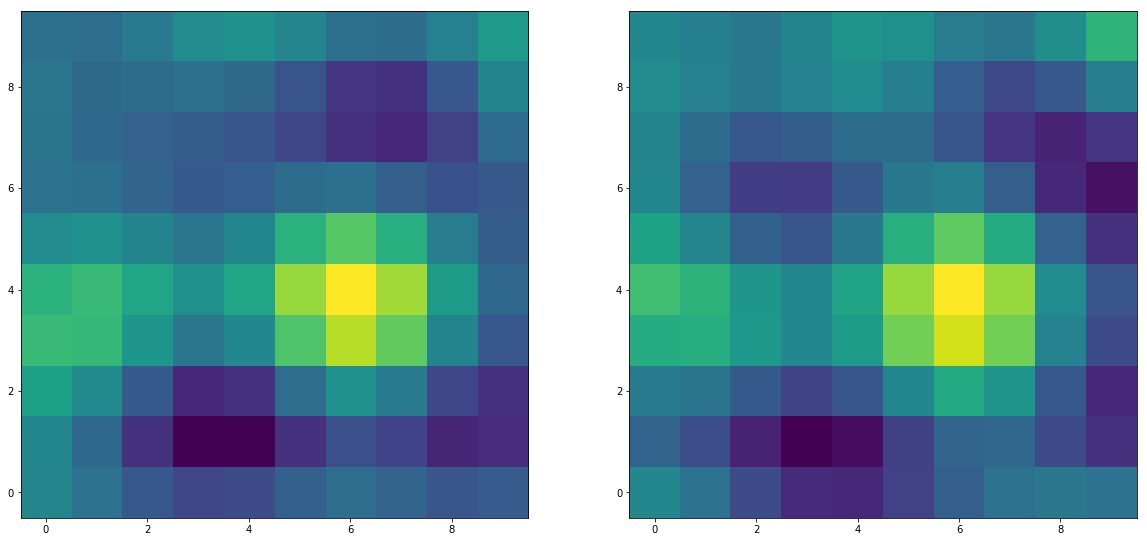

In [59]:
ko = 5.336

nxbinH = np.round(ko * imH.shape[1] * wav_kH[scale] *resoH)
nybinH = np.round(ko * imH.shape[0] * wav_kH[scale] *resoH)

imHbin = congrid(wtH[scale,:,:].real,(nybinH,nxbinH),method='linear')

nxbinP = np.round(ko * (x1P-x0P) * wav_kP[scale] *resoP)
nybinP = np.round(ko * (y1P-y0P) * wav_kP[scale] *resoP)

imPbin = congrid(wtP[scale,int(y0P):int(y1P),int(x0P):int(x1P)].real,(nybinP,nxbinP),method='linear')

figure(figsize=(20,10))
subplot(1,2,1)
imshow(imHbin,origin='below')

subplot(1,2,2)
#imshow(wtP[2*M+scale,:,:].real,origin='below')
imshow(imPbin,origin='below')

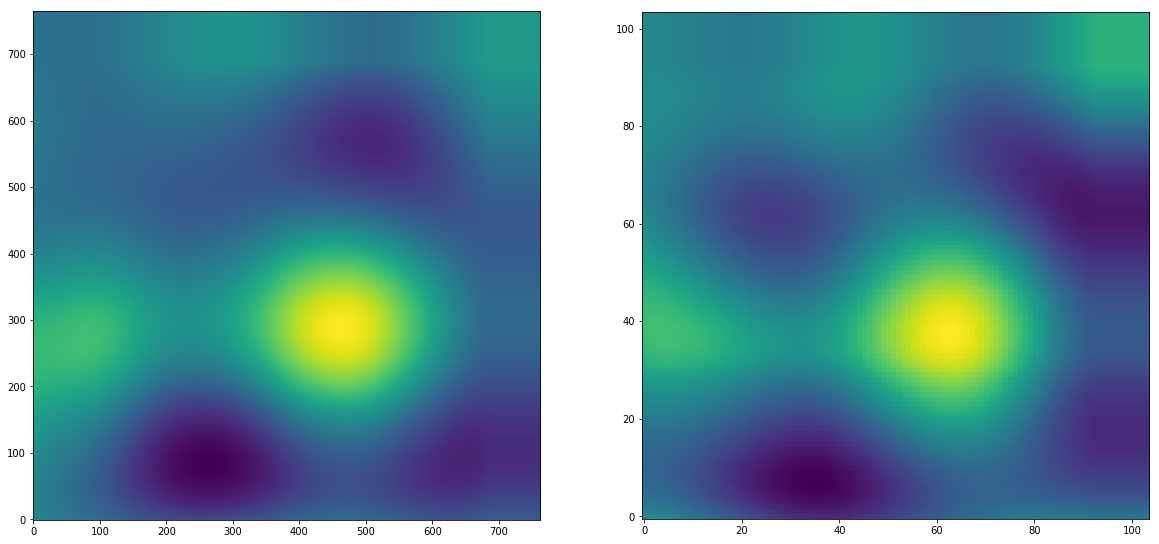

In [60]:
x = np.arange(0,nxbinH)
y = np.arange(0,nybinH)
xx, yy = np.meshgrid(x,y)
winterp = interpolate.interp2d(xx,yy,imHbin, kind='cubic')

xnew = np.linspace(0,nxbinH,imH.shape[1])
ynew = np.linspace(0,nybinH,imH.shape[0])
imHrec = winterp(xnew,ynew)

x = np.arange(0,nxbinP)
y = np.arange(0,nybinP)
xx, yy = np.meshgrid(x,y)
winterp = interpolate.interp2d(xx,yy,imPbin, kind='cubic')

xnew = np.linspace(0,nxbinP,np.int(x1P)-np.int(x0P))
ynew = np.linspace(0,nybinP,np.int(y1P)-np.int(y0P))
imPrec = winterp(xnew,ynew)

figure(figsize=(20,10))
subplot(1,2,1)
imshow(imHrec,origin='below')

subplot(1,2,2)
imshow(imPrec,origin='below')

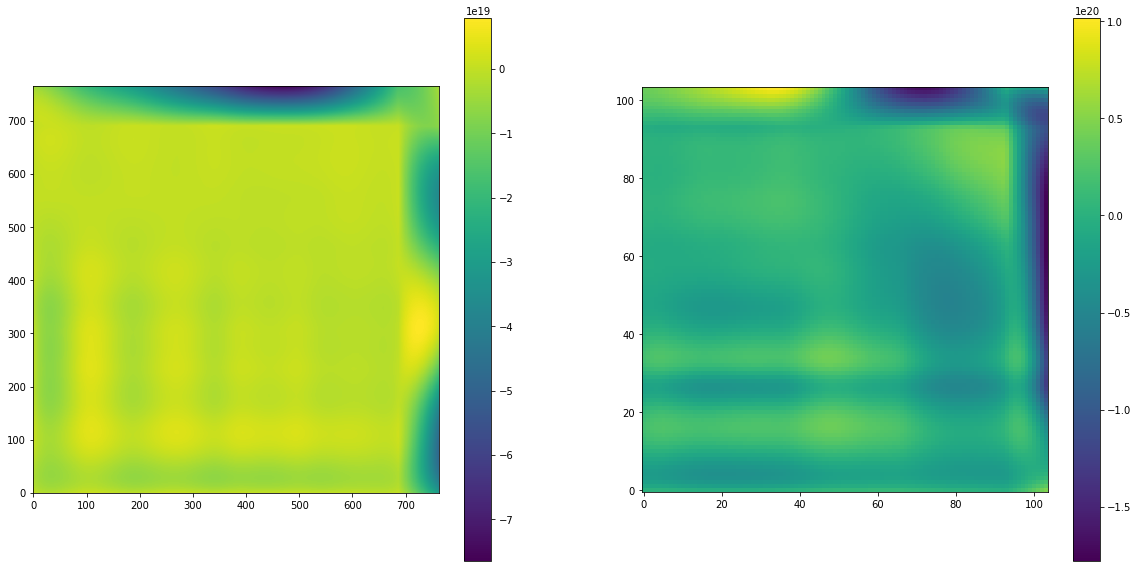

In [61]:
figure(figsize=(20,10))
subplot(1,2,1)
imshow(imHrec-wtH[scale,:,:].real,origin='below')
plt.colorbar()

subplot(1,2,2)
imshow(imPrec-wtP[scale,int(y0P):int(y1P),int(x0P):int(x1P)].real,origin='below')
plt.colorbar()

In [63]:
print imHrec.shape, imPrec.shape
print wtH[scale,:,:].shape, wtP[scale,int(y0P):int(y1P),int(x0P):int(x1P)].shape

(766, 763) (104, 104)
(766, 763) (104, 104)
